# Handling text exercise

## Welcome! This exercise consists of:

### Part 1: Hands on tutorial
1. Implementing the natural language processing pipeline
2. Solving four typical language processing tasks:
   * Sentiment analysis
   * Document classification
   * Topic detection
   * Semantic analysis


#### We will be working with four books in plain text:
1. Moby-Dick, by Herman Melville
2. Frankenstein; or, The Modern Prometheus, by Mary Shelley
3. Pride and Prejudice, by Jane Austen
4. Dracula, Bram Stoker

##### To run this notebook, you need to install the following libraries:

conda install nltk gensim spacy <br>
pip install pyLDAvis  <br>
pip install vaderSentiment  <br>
pip install empath <br>
python -m spacy download en  <br>
python -m nltk.downloader punkt <br>
python -m nltk.downloader all-corpora <br>

### Part 2: Handling text comprehension questions
- You can test your understanding of important NLP concepts. Solutions will be released next week.

### Part 3: Coding exercise
- When you are done, in "Handling_text_exercise_2.ipynb", you will find additional exercises you can work on independently.

# Part 1

In [1]:
# installing libraries

# !conda install nltk gensim spacy 
# !pip3 install pyLDAvis  
# !pip3 install vaderSentiment  
# !pip3 install empath 
# !python3 -m spacy download en  
# !python3 -m nltk.downloader punkt 
# !python3 -m nltk.downloader all-corpora

In [2]:
%load_ext autoreload
%autoreload 2

import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import matplotlib.pyplot as plt
%matplotlib inline  

seed = 42
random.seed(seed)
np.random.seed(seed)

#NLP libraries
import spacy, nltk, gensim, sklearn
#import pyLDAvis.gensim
import pyLDAvis.gensim_models

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Scikit imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

#The data
corpus_root = 'books/'

#### In this tutorial we will be working with text in English. The same principles apply, but the methods cannot be applied directly to the text in unknown or other languages. We will be working mainly with the Spacy library.

Initialize the Spacy analyzer in English

In [3]:
nlp = spacy.load('en_core_web_sm')

/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABL

Load the books

In [5]:
# a list of lists for each character in the corpus
books = list()

for book_file in os.listdir(corpus_root):
    if ".txt" in book_file:
        print(book_file)
        with codecs.open(os.path.join(corpus_root,book_file),encoding="utf8") as f:
            books.append(f.read())

Moby_Dick.txt
Frankenstein.txt
DRACULA.txt
PRIDE_AND_PREJUDICE.txt


In [6]:
len(books)

4

In [7]:
len(books[3])

684781

In [8]:
books[3][3]

'D'

In [9]:
books[3][0:1000]

'PRIDE AND PREJUDICE\n\nBy Jane Austen\n\n\n\nChapter 1\n\n\nIt is a truth universally acknowledged, that a single man in possession\nof a good fortune, must be in want of a wife.\n\nHowever little known the feelings or views of such a man may be on his\nfirst entering a neighbourhood, this truth is so well fixed in the minds\nof the surrounding families, that he is considered the rightful property\nof some one or other of their daughters.\n\n“My dear Mr. Bennet,” said his lady to him one day, “have you heard that\nNetherfield Park is let at last?”\n\nMr. Bennet replied that he had not.\n\n“But it is,” returned she; “for Mrs. Long has just been here, and she\ntold me all about it.”\n\nMr. Bennet made no answer.\n\n“Do you not want to know who has taken it?” cried his wife impatiently.\n\n“_You_ want to tell me, and I have no objection to hearing it.”\n\nThis was invitation enough.\n\n“Why, my dear, you must know, Mrs. Long says that Netherfield is taken\nby a young man of large fortune

Print the beginning of Pride and Prejudice

In [10]:
print(books[3][0:600])

PRIDE AND PREJUDICE

By Jane Austen



Chapter 1


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the rightful property
of some one or other of their daughters.

“My dear Mr. Bennet,” said his lady to him one day, “have you heard that
Netherfield Park is let at last?”

Mr. Bennet replied that he had not.

“But it is,” returned she;


#### Let's remove the new lines

In [11]:
print('A \nbasdas')

A 
basdas


In [12]:
# this splits the text into words
print('A \nbsdasd'.split())

['A', 'bsdasd']


In [13]:
# join, joins all elements of the list on the right with the string " "
print(" ".join('A \nbasdas \asdasad'.split()))

A basdas sdasad


In [14]:
books = [" ".join(b.split()) for b in books]

In [15]:
print(books[3][0:600])

PRIDE AND PREJUDICE By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters. “My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?” Mr. Bennet replied that he had not. “But it is,” returned she; “for Mrs.


### Load Frankenstein

In [16]:
#index all books
book = books[1]

#put in raw text, get a Spacy object
doc = nlp(book)

## Let's create our own NLP pipeline with Spacy!

### Step 1: Sentence splitting

#### May sound trivial, but it's not! (e.g., U.K. or Yahoo!) Spacy uses a statistical model to generate accurate predictions. This works well out of the box for general-purpose text or web text. For social media use dedicated libraries.

In [17]:
sentences = [sent for sent in doc.sents]
print('Sentence 1:',sentences[0],'\n')
print('Sentence 2:',sentences[1],'\n')
print('Sentence 3:',sentences[2],'\n')

Sentence 1: Frankenstein, or the Modern Prometheus by Mary Wollstonecraft (Godwin) 

Sentence 2: Shelley Letter 1 St. Petersburgh, Dec. 11th, 17-- TO Mrs. Saville, England You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. 

Sentence 3: I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking. 



### Step 2: Tokenization

#### The task of splitting a text into meaningful segments called tokens. We segment the sentence into words, punctuation, etc. This is done by first splitting on whitespace characters and them applying rules specific to each language. For example, "don't" does not contain whitespace, but should be split into two tokens, "do" and "n't", while "U.K." should always remain one token and "but," shouldn't.

#### We will analyze the methods on an example sentence first

In [18]:
example = 'I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight.'

doc = nlp(example)

#strings are encoded to hashes
tokens = [token.text for token in doc]

print(example,'\n')
print(tokens)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

['I', 'am', 'already', 'far', 'north', 'of', 'London', ',', 'and', 'as', 'I', 'walk', 'in', 'the', 'streets', 'of', 'Petersburgh', ',', 'I', 'feel', 'a', 'cold', 'northern', 'breeze', 'play', 'upon', 'my', 'cheeks', ',', 'which', 'braces', 'my', 'nerves', 'and', 'fills', 'me', 'with', 'delight', '.']


### Step 3: Part of speech tagging

#### The model makes a prediction of which tag or label most likely applies in this context. For example, a word following "the" in English is most likely a noun.

In [19]:
# pos is part of speech
pos_tagged = [(token.text, token.pos_) for token in doc]

print(example,'\n')
print(pos_tagged)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

[('I', 'PRON'), ('am', 'AUX'), ('already', 'ADV'), ('far', 'ADV'), ('north', 'ADV'), ('of', 'ADP'), ('London', 'PROPN'), (',', 'PUNCT'), ('and', 'CCONJ'), ('as', 'SCONJ'), ('I', 'PRON'), ('walk', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('streets', 'NOUN'), ('of', 'ADP'), ('Petersburgh', 'PROPN'), (',', 'PUNCT'), ('I', 'PRON'), ('feel', 'VERB'), ('a', 'DET'), ('cold', 'ADJ'), ('northern', 'ADJ'), ('breeze', 'NOUN'), ('play', 'VERB'), ('upon', 'SCONJ'), ('my', 'PRON'), ('cheeks', 'NOUN'), (',', 'PUNCT'), ('which', 'PRON'), ('braces', 'VERB'), ('my', 'PRON'), ('nerves', 'NOUN'), ('and', 'CCONJ'), ('fills', 'VERB'), ('me', 'PRON'), ('with', 'ADP'), ('delight', 'NOUN'), ('.', 'PUNCT')]


In [20]:
print(spacy.explain('CCONJ'))
print(spacy.explain('ADP'))
print(spacy.explain('DET'))

coordinating conjunction
adposition
determiner


### When unsure, see here for more details: http://universaldependencies.org/u/pos/all.html

#### More detailed annotation:

In [21]:
pos_tagged = [(token.text, token.tag_) for token in doc]

print(pos_tagged)

[('I', 'PRP'), ('am', 'VBP'), ('already', 'RB'), ('far', 'RB'), ('north', 'RB'), ('of', 'IN'), ('London', 'NNP'), (',', ','), ('and', 'CC'), ('as', 'IN'), ('I', 'PRP'), ('walk', 'VBP'), ('in', 'IN'), ('the', 'DT'), ('streets', 'NNS'), ('of', 'IN'), ('Petersburgh', 'NNP'), (',', ','), ('I', 'PRP'), ('feel', 'VBP'), ('a', 'DT'), ('cold', 'JJ'), ('northern', 'JJ'), ('breeze', 'NN'), ('play', 'VB'), ('upon', 'IN'), ('my', 'PRP$'), ('cheeks', 'NNS'), (',', ','), ('which', 'WDT'), ('braces', 'VBZ'), ('my', 'PRP$'), ('nerves', 'NNS'), ('and', 'CC'), ('fills', 'VBZ'), ('me', 'PRP'), ('with', 'IN'), ('delight', 'NN'), ('.', '.')]


In [22]:
print(spacy.explain('PRP'))
print(spacy.explain('VBP'))

pronoun, personal
verb, non-3rd person singular present


### Step 4: Named entity recognition

#### For example, a person, a country, a product or a book title. Spacy can recognise various types of named entities in a document. This doesn't always work perfectly and might need some tuning later, depending on your use case.

Built in entity types: <br>

PERSON  People, including fictional.  <br>
NORP	Nationalities or religious or political groups. <br>
FAC	Buildings, airports, highways, bridges, etc. <br>
ORG	Companies, agencies, institutions, etc. <br>
GPE	Countries, cities, states. <br>
LOC	Non-GPE locations, mountain ranges, bodies of water. <br>
PRODUCT	Objects, vehicles, foods, etc. (Not services.) <br>
EVENT	Named hurricanes, battles, wars, sports events, etc. <br>
WORK_OF_ART	Titles of books, songs, etc. <br>
LAW	Named documents made into laws. <br>
LANGUAGE	Any named language. <br>
DATE	Absolute or relative dates or periods. <br>
TIME	Times smaller than a day. <br>
PERCENT	Percentage, including "%". <br>
MONEY	Monetary values, including unit. <br>
QUANTITY	Measurements, as of weight or distance. <br>
ORDINAL	"first", "second", etc. <br>
CARDINAL	Numerals that do not fall under another type. <br>

In [23]:
import pprint

print(example,'\n')
for ent in doc.ents:
    print(ent.text, ent.label_)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

London GPE
Petersburgh GPE


### Step 5: Removing stop words

Stopwords are words that are insignificant for nlp processing.

Let's check out all the stopwords:

In [24]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords))
print('First ten stop words:',list(spacy_stopwords)[:10])

Number of stop words: 326
First ten stop words: ['may', 'whereby', 'all', 'will', 'full', 'yourself', 'did', 'twelve', '’m', '’s']


Detecting stopwords in the example:

In [25]:
print(example,'\n')

stop_words = [token.text for token in doc if token.is_stop]

print(stop_words, '\n')
print([token.text for token in doc if not token.is_stop])

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

['I', 'am', 'already', 'of', 'and', 'as', 'I', 'in', 'the', 'of', 'I', 'a', 'upon', 'my', 'which', 'my', 'and', 'me', 'with'] 

['far', 'north', 'London', ',', 'walk', 'streets', 'Petersburgh', ',', 'feel', 'cold', 'northern', 'breeze', 'play', 'cheeks', ',', 'braces', 'nerves', 'fills', 'delight', '.']


#### Sometimes it's useful to define a custom list of stopwords. Other solutions: https://www.ranks.nl/stopwords 


### Step 6: Lemmatization

#### A rule-based deterministic lemmatizer maps the surface form of a token to a lemma.

In [26]:
print(example,'\n')
for token in doc:
    if token.text != token.lemma_:
        print(token.text,'--->',token.lemma_)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

am ---> be
streets ---> street
cheeks ---> cheek
braces ---> brace
nerves ---> nerve
fills ---> fill
me ---> I


In [27]:
print([token.lemma_ for token in doc])

['I', 'be', 'already', 'far', 'north', 'of', 'London', ',', 'and', 'as', 'I', 'walk', 'in', 'the', 'street', 'of', 'Petersburgh', ',', 'I', 'feel', 'a', 'cold', 'northern', 'breeze', 'play', 'upon', 'my', 'cheek', ',', 'which', 'brace', 'my', 'nerve', 'and', 'fill', 'I', 'with', 'delight', '.']


### Step 7: Chunking (shallow parsing)

#### Noun chunks are "base noun phrases" – flat phrases that have a noun as their head -- a noun plus the words describing the noun – for example, "the lavish green grass" or "the world’s largest tech fund". 

In [28]:
print(example,'\n')

for chunk in doc.noun_chunks:
    print(chunk.text)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

I
London
I
the streets
Petersburgh
I
my cheeks
which
my nerves
me
delight


### Step 8: Dependancy parsing

#### Dependency parsing is a method to analyze the grammatical structure of text. The structure is that there exists HEADs in text that are modified by CHILDREN through various transformations (i.e. adjective, conjugation etc.). And that is how language works.

#### The terms head and child describe the words connected by an arc in the dependency tree. The type of syntactic relation that connects the child to the head can be obtain through .dep_.

In [29]:
print(example,'\n')

for token in doc:
    print('Token:',token.text,'Head:',token.head.text, 'Children:',[child for child in token.children])

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

Token: I Head: am Children: []
Token: am Head: am Children: [I, already, north, ,, and, feel]
Token: already Head: am Children: []
Token: far Head: north Children: []
Token: north Head: am Children: [far, of]
Token: of Head: north Children: [London]
Token: London Head: of Children: []
Token: , Head: am Children: []
Token: and Head: am Children: []
Token: as Head: walk Children: []
Token: I Head: walk Children: []
Token: walk Head: feel Children: [as, I, in]
Token: in Head: walk Children: [streets]
Token: the Head: streets Children: []
Token: streets Head: in Children: [the, of]
Token: of Head: streets Children: [Petersburgh]
Token: Petersburgh Head: of Children: []
Token: , Head: feel Children: []
Token: I Head: feel Children: []
Token: feel Head: am Children: [walk, ,, I, play, .]
Token: a Head: play Child

### Counting word occurences

In [30]:
from collections import Counter

print(example,'\n')
words = [token.text for token in doc]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common()

print(common_words,'\n')
print(word_freq.most_common(5),'\n')
print(word_freq)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

[('I', 3), (',', 3), ('of', 2), ('and', 2), ('my', 2), ('am', 1), ('already', 1), ('far', 1), ('north', 1), ('London', 1), ('as', 1), ('walk', 1), ('in', 1), ('the', 1), ('streets', 1), ('Petersburgh', 1), ('feel', 1), ('a', 1), ('cold', 1), ('northern', 1), ('breeze', 1), ('play', 1), ('upon', 1), ('cheeks', 1), ('which', 1), ('braces', 1), ('nerves', 1), ('fills', 1), ('me', 1), ('with', 1), ('delight', 1), ('.', 1)] 

[('I', 3), (',', 3), ('of', 2), ('and', 2), ('my', 2)] 

Counter({'I': 3, ',': 3, 'of': 2, 'and': 2, 'my': 2, 'am': 1, 'already': 1, 'far': 1, 'north': 1, 'London': 1, 'as': 1, 'walk': 1, 'in': 1, 'the': 1, 'streets': 1, 'Petersburgh': 1, 'feel': 1, 'a': 1, 'cold': 1, 'northern': 1, 'breeze': 1, 'play': 1, 'upon': 1, 'cheeks': 1, 'which': 1, 'braces': 1, 'nerves': 1, 'fills': 1, 'me': 1, 'w

### Without stop words and punctuation

In [31]:
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common()

print(common_words)

[('far', 1), ('north', 1), ('London', 1), ('walk', 1), ('streets', 1), ('Petersburgh', 1), ('feel', 1), ('cold', 1), ('northern', 1), ('breeze', 1), ('play', 1), ('cheeks', 1), ('braces', 1), ('nerves', 1), ('fills', 1), ('delight', 1)]


## Putting all the components together

### Under the hood: the pipeline ["tokenizer","tagger", "parser", "ner"].

#### The NLP pipeline with Spacy
<img src="spacy.png">

In [32]:
nlp = spacy.load('en_core_web_sm')

/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABL

### If you don't need a particular component of the pipeline – for example, the tagger or the parser, you can disable loading it. This can sometimes make a big difference and improve loading speed. 

In [33]:
nlp.remove_pipe('parser')
nlp.remove_pipe('tagger')

('tagger', <spacy.pipeline.tagger.Tagger at 0x13b8d2680>)

## Task 1: Sentiment analysis

### Initialize the analyzer. Typically used for data from social media (short sentences).

In [34]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(example)

### The sentiment score consits of four values. Neutral, positive and negative sum to one. The final score is obtained by thresholding the compound value (e.g. +/-0.05).

In [35]:
print(example, '\n')
print('Negative sentiment:',vs['neg'])
print('Neutral sentiment:',vs['neu'])
print('Positive sentiment:',vs['pos'])
print('Compound sentiment:',vs['compound'])

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

Negative sentiment: 0.035
Neutral sentiment: 0.806
Positive sentiment: 0.159
Compound sentiment: 0.7096


### We can now observe the distributions of sentiment across all sentences in the book Pride and Prejudice:

In [36]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(books[3])

/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABL

Text(0, 0.5, 'Number of sentences')

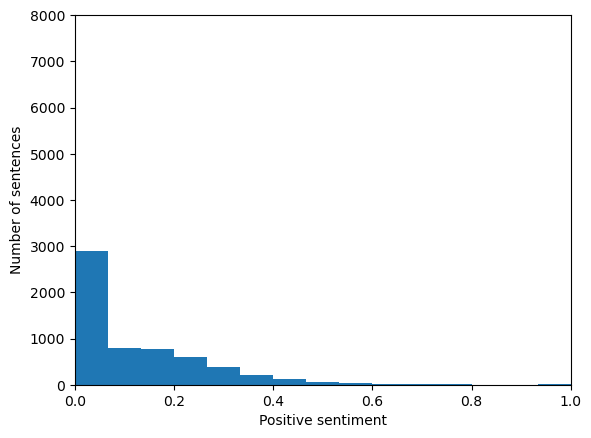

In [37]:
positive_sent = []
#iterate through the sentences, get polarity scores, choose a value
[positive_sent.append(analyzer.polarity_scores(sent.text)['pos']) for sent in doc.sents]
plt.hist(positive_sent,bins=15)
plt.xlim([0,1])
plt.ylim([0,8000])
plt.xlabel('Positive sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

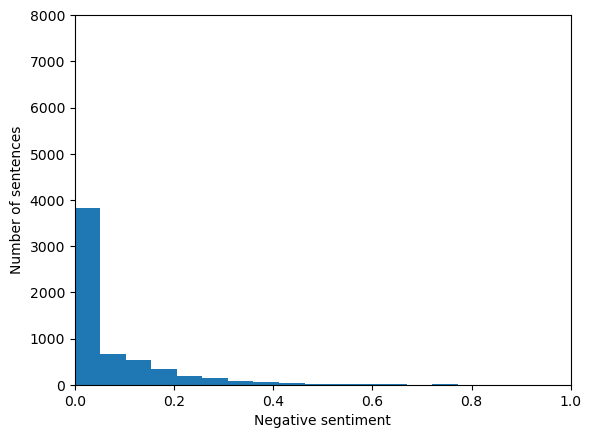

In [38]:
negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent.text)['neg']) for sent in doc.sents]
plt.hist(negative_sent,bins=15)
plt.xlim([0,1])
plt.ylim([0,8000])
plt.xlabel('Negative sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

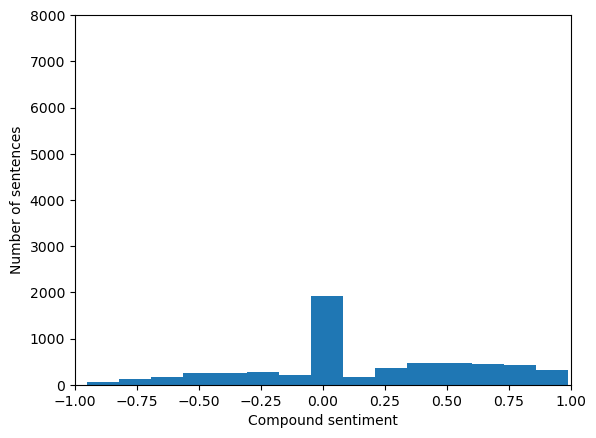

In [39]:
total_sent = []
[total_sent.append(analyzer.polarity_scores(sent.text)['compound']) for sent in doc.sents]
plt.hist(total_sent,bins = 15)
plt.xlim([-1,1])
plt.ylim([0,8000])
plt.xlabel('Compound sentiment')
plt.ylabel('Number of sentences')

In [40]:
sents = [analyzer.polarity_scores(sent.text)['compound'] for sent in doc.sents]
print('Number of positive sentences:',sum(np.array(sents)>=0.05))
print('Number of negative sentences:',sum(np.array(sents)<=-0.05))
print('Number of neutral sentences:',sum(np.abs(np.array(sents))<0.05))

Number of positive sentences: 2724
Number of negative sentences: 1339
Number of neutral sentences: 1863


#### Most of the sentences are quite neutral in sentiment. This is not the case when working with data from other sources (e.g., in social media opinions are strong and polarized (bimodal distribution)).

## Task 2: Document classification: Can we detect paragraphs from Frankenstein?

In [41]:
# Let's load our corpus via NLTK this time
from nltk.corpus import PlaintextCorpusReader

our_books = PlaintextCorpusReader(corpus_root, '.*.txt')
print(our_books.fileids())

['DRACULA.txt', 'Frankenstein.txt', 'Moby_Dick.txt', 'PRIDE_AND_PREJUDICE.txt']


### We will segment the books into equally long chunks

In [42]:
our_books.__dict__

{'_fileids': ['DRACULA.txt',
  'Frankenstein.txt',
  'Moby_Dick.txt',
  'PRIDE_AND_PREJUDICE.txt'],
 '_root': FileSystemPathPointer('/Users/andreiredis/Documents/School/Applied data analysis/Course_Material.nosync/Tutorials/09 - Handing text/books'),
 '_readme': 'README',
 '_license': 'LICENSE',
 '_citation': 'citation.bib',
 '_encoding': 'utf8',
 '_tagset': None,
 '_word_tokenizer': WordPunctTokenizer(pattern='\\w+|[^\\w\\s]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL),
 '_sent_tokenizer': <nltk.tokenize.punkt.PunktSentenceTokenizer object at 0x12d7f8d60>,
 '_para_block_reader': <function nltk.corpus.reader.util.read_blankline_block(stream)>}

In [43]:
{f:n for n,f in enumerate(our_books.fileids())}

{'DRACULA.txt': 0,
 'Frankenstein.txt': 1,
 'Moby_Dick.txt': 2,
 'PRIDE_AND_PREJUDICE.txt': 3}

In [44]:
# divide a document in sentences
our_books.sents('Frankenstein.txt')[:7]

[['Frankenstein', ','],
 ['or', 'the', 'Modern', 'Prometheus'],
 ['by'],
 ['Mary', 'Wollstonecraft', '(', 'Godwin', ')', 'Shelley'],
 ['Letter', '1'],
 ['St', '.', 'Petersburgh', ',', 'Dec', '.', '11th', ',', '17', '--'],
 ['TO', 'Mrs', '.', 'Saville', ',', 'England']]

In [45]:
'A goldfish in the pond'[4:4 + 2]

'ld'

In [46]:
def get_chunks(document, sentence_size):
    """(of sentences)
    Yield successive n-sentence-sized chunks from l.
    l: """
    for i in range(0, len(document), sentence_size):
        # from i to i+ sentence size
        yield document[i : (i + sentence_size)]

[x for x in get_chunks(our_books.sents('Frankenstein.txt')[:7],3)]

[[['Frankenstein', ','], ['or', 'the', 'Modern', 'Prometheus'], ['by']],
 [['Mary', 'Wollstonecraft', '(', 'Godwin', ')', 'Shelley'],
  ['Letter', '1'],
  ['St', '.', 'Petersburgh', ',', 'Dec', '.', '11th', ',', '17', '--']],
 [['TO', 'Mrs', '.', 'Saville', ',', 'England']]]

In [47]:
nltk.download('punkt')

def get_chunks(document, sentence_size):
    """(of sentences)
    Yield successive n-sentence-sized chunks from l.
    l: """
    for i in range(0, len(document), sentence_size):
        # from i to i+ sentence size
        yield document[i : (i + sentence_size)]

# Get the data
# f:n = key:value
BOOK_ID = {f:n for n,f in enumerate(our_books.fileids())} # dictionary of books
LIMIT = 500 # how many chunks total
SIZE = 50 # how many sentences per chunk/page

chunks = list()
# for each item (sentence), keep the original book it comes from
chunk_class = list() # this list contains the original book of the chunk, for evaluation

# for each book (as 'Dracula.txt')
for f in our_books.fileids():
    # Extract sentences of book
    sentences = our_books.sents(f)
    print(f,":")
    print('Number of sentences:',len(sentences))
    
    # create chunks
    # chunk = list of sentences of given size
    chunks_of_sents = [x for x in get_chunks(sentences,SIZE)] # this is a list of lists of sentences, which are a list of tokens
    
    # chunks - a temporary variable
    chs = list()
    
    # convert chunks (as list of sentences) -> chunks (as one string separated by " ")
    # regroup so to have a list of chunks which are strings
    for c in chunks_of_sents:
        grouped_chunk = list()
        for s in c:
            grouped_chunk.extend(s)
        chs.append(" ".join(grouped_chunk))
    print("Number of chunks:",len(chs),'\n')
    
    # filter to the limit, to have the same number of chunks per book
    # the final chunks = 
    chunks.extend(chs[:LIMIT])
    chunk_class.extend([BOOK_ID[f] for _ in range(len(chs[:LIMIT]))])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andreiredis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


DRACULA.txt :
Number of sentences: 9303
Number of chunks: 187 

Frankenstein.txt :
Number of sentences: 3378
Number of chunks: 68 

Moby_Dick.txt :
Number of sentences: 9609
Number of chunks: 193 

PRIDE_AND_PREJUDICE.txt :
Number of sentences: 6055
Number of chunks: 122 



Output of chunks

In [48]:
chunk_class[0]

0

In [49]:
# a chunk of 50 sentences - all 4 documents are minced into chunks here
chunks[0]

'DRACULA Bram Stoker CHAPTER I JONATHAN HARKER \' S JOURNAL ( _Kept in shorthand . _ ) _3 May . Bistritz . _ -- Left Munich at 8 : 35 P . M ., on 1st May , arriving at Vienna early next morning ; should have arrived at 6 : 46 , but train was an hour late . Buda - Pesth seems a wonderful place , from the glimpse which I got of it from the train and the little I could walk through the streets . I feared to go very far from the station , as we had arrived late and would start as near the correct time as possible . The impression I had was that we were leaving the West and entering the East ; the most western of splendid bridges over the Danube , which is here of noble width and depth , took us among the traditions of Turkish rule . We left in pretty good time , and came after nightfall to Klausenburgh . Here I stopped for the night at the Hotel Royale . I had for dinner , or rather supper , a chicken done up some way with red pepper , which was very good but thirsty . ( _Mem . _ , get rec

### Representing the chunks with bag-of-words

In [50]:
# from sklearn, Count vectorizer for bag of words features
vectorizer = CountVectorizer()

#initialize and specify minumum number of occurences to avoid untractable number of features
#vectorizer = CountVectorizer(min_df = 2) if we want high frequency

#create bag of words features
X = vectorizer.fit_transform(chunks)

print('Number of samples:',X.toarray().shape[0])
print('Number of features:',X.toarray().shape[1])

#mask and convert to int Frankenstein
Y = np.array(chunk_class) == 1
Y = Y.astype(int)  

#shuffle the data
X, Y = shuffle(X, Y, random_state=0)

#split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Number of samples: 570
Number of features: 23116


### Let's fit the regularized logistic regression. We will crossvalidate the regularization parameter on the training set.

In [51]:
accs = []

#the grid of regularization parameter 
grid = [0.01,0.1,1,10,100,1000,10000]

for c in grid:
    
    #initialize the classifier
    clf = LogisticRegression(random_state=0, solver='lbfgs',C = c)
    
    #crossvalidate
    scores = cross_val_score(clf, X_train,Y_train, cv=10)
    accs.append(np.mean(scores))

(0.986, 1.0)

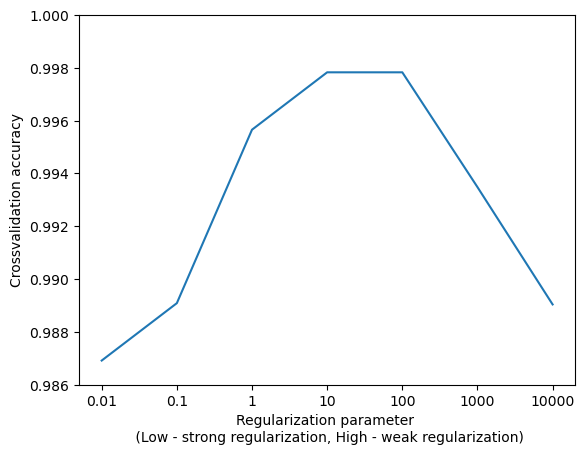

In [52]:
plt.plot(accs)
plt.xticks(range(len(grid)), grid)
plt.xlabel('Regularization parameter \n (Low - strong regularization, High - weak regularization)')
plt.ylabel('Crossvalidation accuracy')
plt.ylim([0.986,1])

/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


(0.985, 1.0)

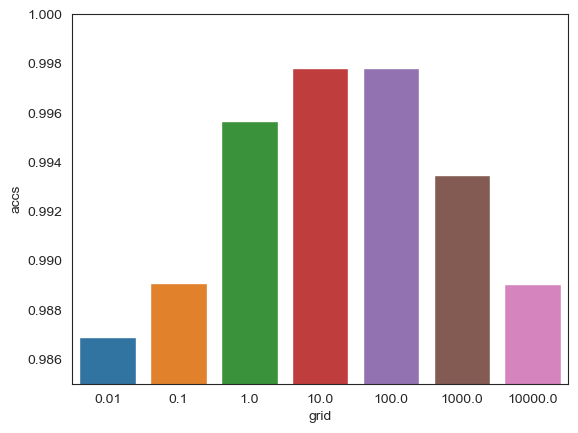

In [53]:
import seaborn as sns
import pandas as pd
sns.set_style('white')
sns.barplot(data=pd.DataFrame(np.array([grid,accs]).T, columns=['grid','accs']),x='grid',y='accs')
plt.ylim([0.985,1])

### Let's train again, on the entire training set, with the chosen regularization parameter. We will test on the test set

In [54]:
clf = LogisticRegression(random_state=0, solver='lbfgs',C = 10).fit(X_train,Y_train)

#predict on the test set
print('Accuracy:',clf.score(X_test,Y_test))

Accuracy: 0.9824561403508771


### What features characterize Frankenstein? Bag of words are interpretable!

In [55]:
coefs=clf.coef_[0]
top_three = np.argpartition(coefs, -20)[-20:]

print(np.array(vectorizer.get_feature_names())[top_three])

# alternative 
# np.array(vectorizer.get_feature_names())[np.argsort(coefs)[-20:]]

['frankenstein' 'towards' 'death' 'creature' 'by' 'misery' 'but' 'justine'
 'yet' 'my' 'had' 'who' 'poor' 'me' 'and' 'will' 'this' 'father' 'of'
 'which']


### We can perfectly predict paragraphs from Frankenstein! We saw issues of high dimensionality when using bag of words (more features than samples) and how regularization helps.

### Alternative text representation: word emdeddings, pretrained on intergraded in Spacy (300-dimensional word vectors trained on Common Crawl with GloVe.) Depending on the application, might be suitable or not

In [56]:
print(example,'\n')
print('Embedding representation:',list((nlp(example).vector)[0:10]),'...')

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

Embedding representation: [-0.06188344, 0.08038266, 0.066186346, 0.10680729, -0.11235798, -0.2166132, 0.20310505, -0.13948976, 0.15524137, -0.20551796] ...


## Task 3: Topic detection

In [57]:
# Get the chunks again (into smaller chunks)
book_id = {f:n for n,f in enumerate(our_books.fileids())} # dictionary of books
chunks = list()
chunk_class = list() # this list contains the original book of the chunk, for evaluation

limit = 60 # how many chunks total
size = 50 # how many sentences per chunk/page

for f in our_books.fileids():
    sentences = our_books.sents(f)
    print(f)
    print('Number of sentences:',len(sentences))
    
    # create chunks
    chunks_of_sents = [x for x in get_chunks(sentences,size)] # this is a list of lists of sentences, which are a list of tokens
    chs = list()
    
    # regroup so to have a list of chunks which are strings
    for c in chunks_of_sents:
        grouped_chunk = list()
        for s in c:
            grouped_chunk.extend(s)
        chs.append(" ".join(grouped_chunk))
    print("Number of chunks:",len(chs),'\n')
    
    # filter to the limit, to have the same number of chunks per book
    chunks.extend(chs[:limit])
    chunk_class.extend([book_id[f] for _ in range(len(chs[:limit]))])

DRACULA.txt
Number of sentences: 9303
Number of chunks: 187 

Frankenstein.txt
Number of sentences: 3378
Number of chunks: 68 

Moby_Dick.txt
Number of sentences: 9609
Number of chunks: 193 

PRIDE_AND_PREJUDICE.txt
Number of sentences: 6055
Number of chunks: 122 



In [58]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

processed_docs = list()
for doc in nlp.pipe(chunks, n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
docs = processed_docs
del processed_docs

/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABL

Bigram = "Operating system"

Trigram = "Costa del Sol"

In [59]:
# Add bigrams too
from gensim.models.phrases import Phrases

# Add bigrams to docs (only ones that appear 15 times or more).
bigram = Phrases(docs, min_count=15)

#go through each doc
for idx in range(len(docs)):
    # select the gensim generated bigrams for that doc (if they exist at all)
    # bigram[docs[1]] will have all tokens of doc1 but with bigrams joined by _ if they exist
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [60]:
# no bigrams when min count = 15
bigram[docs[1]]

['evidently',
 'expect',
 'near',
 'door',
 'face',
 'cheery',
 'look',
 'elderly',
 'woman',
 'usual',
 'peasant',
 'dress',
 'white',
 'undergarment',
 'long',
 'double',
 'apron',
 'coloured',
 'stuff',
 'fit',
 'tight',
 'modesty',
 'come',
 'close',
 'bow',
 'Herr',
 'Englishman',
 'yes',
 'Jonathan',
 'Harker',
 'smile',
 'message',
 'elderly',
 'man',
 'white',
 'shirt',
 'sleeve',
 'follow',
 'door',
 'immediately',
 'return',
 'letter',
 'friend',
 'welcome',
 'Carpathians',
 'anxiously',
 'expect',
 'sleep',
 'night',
 'morrow',
 'diligence',
 'start',
 'Bukovina',
 'place',
 'Borgo',
 'Pass',
 'carriage',
 'await',
 'bring',
 'trust',
 'journey',
 'London',
 'happy',
 'enjoy',
 'stay',
 'beautiful',
 'land',
 'friend',
 'DRACULA',
 'find',
 'landlord',
 'letter',
 'Count',
 'direct',
 'secure',
 'good',
 'place',
 'coach',
 'inquiry',
 'detail',
 'somewhat',
 'reticent',
 'pretend',
 'understand',
 'German',
 'true',
 'understand',
 'perfectly',
 'answer',
 'question',
 'exa

In [89]:
# number of tokens in chunks - they vary because they were lematized, stopwords removed
# and sentences were not the same length to begin with.
print(len(docs[1]), len(docs[0]))

267 454


In [61]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)

# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
MAX_FREQ = 0.5
MIN_WORDCOUNT = 5
dictionary.filter_extremes(no_below=MIN_WORDCOUNT, no_above=MAX_FREQ)

# Bag-of-words representation of the documents using gensim dictionary
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus) 

print('Number of unique tokens: %d' % len(dictionary))
print('Number of chunks: %d' % len(corpus))

Number of unique tokens: 3073
Number of chunks: 240


In [97]:
# one dictionary combined for all the docs.
Dictionary(docs)[100]

'continuous'

In [100]:
# word2bow makes the dictionary sparse for a given doc (doesn't give 0 to the non existent words)
corpus[2]


[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (10, 1),
 (13, 1),
 (14, 1),
 (18, 1),
 (21, 1),
 (25, 1),
 (29, 2),
 (38, 1),
 (51, 3),
 (52, 3),
 (57, 1),
 (63, 1),
 (65, 2),
 (69, 1),
 (75, 1),
 (80, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (88, 1),
 (89, 1),
 (97, 1),
 (98, 8),
 (99, 2),
 (107, 1),
 (109, 1),
 (112, 2),
 (113, 1),
 (114, 4),
 (115, 1),
 (121, 1),
 (122, 3),
 (132, 2),
 (134, 1),
 (135, 3),
 (136, 1),
 (138, 2),
 (145, 2),
 (146, 1),
 (147, 1),
 (149, 1),
 (151, 7),
 (153, 5),
 (156, 1),
 (159, 1),
 (164, 1),
 (165, 2),
 (167, 1),
 (169, 2),
 (173, 3),
 (174, 1),
 (175, 1),
 (182, 1),
 (184, 3),
 (185, 2),
 (189, 1),
 (198, 2),
 (200, 1),
 (201, 1),
 (204, 3),
 (205, 2),
 (207, 1),
 (210, 1),
 (212, 1),
 (217, 1),
 (219, 2),
 (221, 2),
 (225, 1),
 (226, 1),
 (228, 4),
 (239, 1),
 (243, 3),
 (244, 1),
 (245, 1),
 (253, 1),
 (262, 1),
 (265, 1),
 (267, 2),
 (268, 1),
 (270, 4),
 (271, 1),
 (286, 1),
 (292, 2),
 (299, 1),
 (308, 1),
 (314, 1),
 (317, 1),
 (318, 1),
 (319, 1),
 (320, 1)

In [62]:
# models
from gensim.models import LdaMulticore
params = {'passes': 10, 'random_state': seed}
base_models = dict() # ????
model = LdaMulticore(corpus=corpus, num_topics=4, id2word=dictionary, workers=6,
                passes=params['passes'], random_state=params['random_state'])

In [107]:
model.show_topics(num_words=5)

[(0,
  '0.006*"father" + 0.005*"life" + 0.004*"feeling" + 0.004*"mind" + 0.004*"night"'),
 (1,
  '0.019*"whale" + 0.012*"ship" + 0.011*"sea" + 0.009*"old" + 0.007*"Queequeg"'),
 (2,
  '0.016*"Elizabeth" + 0.011*"Darcy" + 0.010*"Bingley" + 0.009*"Miss" + 0.009*"Bennet"'),
 (3,
  '0.009*"room" + 0.009*"night" + 0.008*"door" + 0.007*"sleep" + 0.007*"Lucy"')]

In [103]:
model.show_topic(1,20)

[('whale', 0.01901814),
 ('ship', 0.011749362),
 ('sea', 0.010657897),
 ('old', 0.008680724),
 ('Queequeg', 0.0071314913),
 ('Captain', 0.0062645418),
 ('Ahab', 0.005982809),
 ('head', 0.0050672097),
 ('Bildad', 0.0042054583),
 ('sail', 0.004099399),
 ('stand', 0.003959704),
 ('Peleg', 0.0038760898),
 ('world', 0.003736297),
 ('deck', 0.0036871354),
 ('sort', 0.0036738582),
 ('thou', 0.0036718103),
 ('God', 0.0036223829),
 ('round', 0.0034476332),
 ('Jonah', 0.003444177),
 ('voyage', 0.003317124)]

In [117]:
corpus[0]

[(0, 3),
 (1, 1),
 (2, 1),
 (3, 3),
 (4, 3),
 (5, 2),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 2),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 3),
 (17, 2),
 (18, 3),
 (19, 1),
 (20, 3),
 (21, 2),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 2),
 (29, 2),
 (30, 2),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 2),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 2),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 7),
 (49, 2),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 2),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 2),
 (71, 1),
 (72, 1),
 (73, 2),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 2),
 (95, 1),
 (96, 2),
 (97, 1),
 (98, 1),
 (99, 2),
 (100, 2),

In [123]:
# get the topic distribution for the second chunk
# this is a list of tuples (topic, probability)
# the topic with the highest probability is the one that the chunk belongs to
# the probability is the confidence of the model
# the topic is the index of the topic in the model
model[corpus[1]]

# show the probability of the second chunk belonging to all possible topics
model.get_document_topics(corpus[1])

[(3, 0.99578416)]

In [129]:
# show the probability of the second chunk belonging to all possible topics
model.get_document_topics(corpus[1], minimum_probability=0.0)

[(0, 0.0013881777), (1, 0.0013869926), (2, 0.0014408077), (3, 0.995784)]

In [134]:
# sort the topics by probability
sorted(model[corpus[1]],key=lambda x:x[1],reverse=True)

[(3, 0.99578196), (2, 0.0014428376), (0, 0.0013881783), (1, 0.0013869932)]

In [66]:
# plot topics
data =  pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

In [67]:
# sent_to_cluster is a list of the cluster that each chunk belongs to
# the cluster is the index of the topic in the model
sent_to_cluster = list()
for n,doc in enumerate(corpus):
    # if the chunk is not empty
    if doc:
        # cluster is a tuple (topic, probability)
        cluster = max(model[doc],key=lambda x:x[1])
        sent_to_cluster.append(cluster[0])

In [137]:
sent_to_cluster[:10]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [139]:
book_id.items()

dict_items([('DRACULA.txt', 0), ('Frankenstein.txt', 1), ('Moby_Dick.txt', 2), ('PRIDE_AND_PREJUDICE.txt', 3)])

In [140]:
chunk_class[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

We want to check if the 4 topics with LDA correspond to the 4 books.

In [68]:
# accuracy of the model for each book 
# (how many chunks belong to the topic that the book belongs to)
from collections import Counter
# for each book and its cluster (topic, i.e. book_id)
for book, cluster in book_id.items():
    # assignments is the predicted topic for each chunk for the respective book
    predicted = list()
    for real,given in zip(chunk_class,sent_to_cluster):
        if real == cluster:
            # if the chunk belongs to the respective book, add the predicted topic to the list
            # i.e. select the chunks that belong to the respective book
            predicted.append(given)
    # num_most_common is the number of chunks that belong to that topic
    # counter is a value count in the predicted list i.e. what topic value appears the most
    most_common_topic_predicted,topic_count_predicted = Counter(predicted).most_common(1)[0] 
    print(book,":",most_common_topic_predicted,"-",topic_count_predicted)
    print("Accuracy:",topic_count_predicted/limit) # limit is the number of chunks per book
    print("------")

DRACULA.txt : 3 - 54
Accuracy: 0.9
------
Frankenstein.txt : 0 - 60
Accuracy: 1.0
------
Moby_Dick.txt : 1 - 52
Accuracy: 0.8666666666666667
------
PRIDE_AND_PREJUDICE.txt : 2 - 60
Accuracy: 1.0
------


In [157]:
for y_true, y_pred in zip(chunk_class, sent_to_cluster):
    print(y_true, y_pred)

58

In [147]:
chunk_class[-10:]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [141]:
# for the last book
assignments

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [148]:
# value count of assignmed topic list for the last book
Counter(assignments)

Counter({2: 60})

And the topics correspond 86%-100%

## Task 4: Semantic analysis based on lexical categories

In [159]:
from empath import Empath
lexicon = Empath()

### Let's see what pre-build categories we can study! More information: https://hci.stanford.edu/publications/2016/ethan/empath-chi-2016.pdf

In [160]:
for cat in list(lexicon.cats.keys())[:20]:
    print(cat)

help
office
dance
money
wedding
domestic_work
sleep
medical_emergency
cold
hate
cheerfulness
aggression
occupation
envy
anticipation
family
vacation
crime
attractive
masculine


### For each category, we can examine representative terms

In [71]:
lexicon.cats["health"][:15]

['coma',
 'schizophrenic',
 'biopsy',
 'respiratory',
 'institution',
 'diabetes',
 'clinic',
 'syndrome',
 'vitamin',
 'medicine',
 'examination',
 'symptom',
 'sufferer',
 'epilepsy',
 'transplant']

### Studying Pride and Prejudice

In [72]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(books[3])

/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABL

In [73]:
empath_features = lexicon.analyze(doc.text,categories = ["disappointment", "pain", "joy", "beauty", "affection"])

In [74]:
empath_features

{'disappointment': 149.0,
 'pain': 228.0,
 'joy': 278.0,
 'beauty': 136.0,
 'affection': 439.0}

In [75]:
empath_features = lexicon.analyze(doc.text,categories = ["disappointment", "pain", "joy", "beauty", "affection"], normalize = True)

In [76]:
empath_features

{'disappointment': 0.0012256615693403638,
 'pain': 0.001875508978587939,
 'joy': 0.002286804807225645,
 'beauty': 0.0011187246538945602,
 'affection': 0.0036111773754390585}

### Usecase: the evolution of topics

In [77]:
bins = range(0,len(doc.text),150000)


In [78]:
love = []
pain = []
beauty = []
affection = []


for cnt,i in enumerate(bins[:-1]):
    empath_features = lexicon.analyze(doc.text[bins[cnt]:bins[cnt+1]],
                                      categories = ["love", "pain", "joy", "beauty", "affection"], normalize = True)
    love.append(empath_features["love"])
    pain.append(empath_features["pain"])
    beauty.append(empath_features["beauty"])
    affection.append(empath_features["affection"])

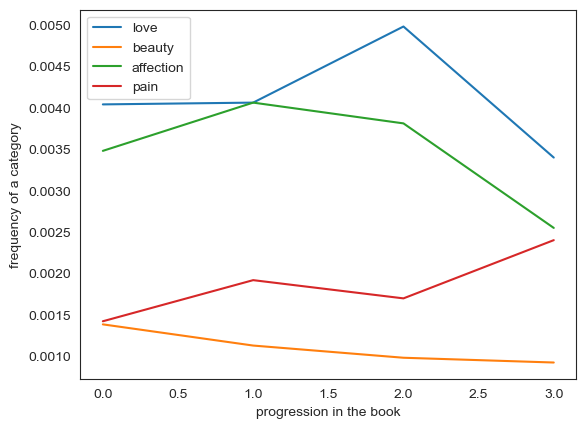

In [79]:
plt.plot(love,label = "love")
plt.plot(beauty, label = "beauty")
plt.plot(affection, label = "affection")
plt.plot(pain,label = "pain")

plt.xlabel("progression in the book")
plt.ylabel("frequency of a category")
plt.legend()

<AxesSubplot: >

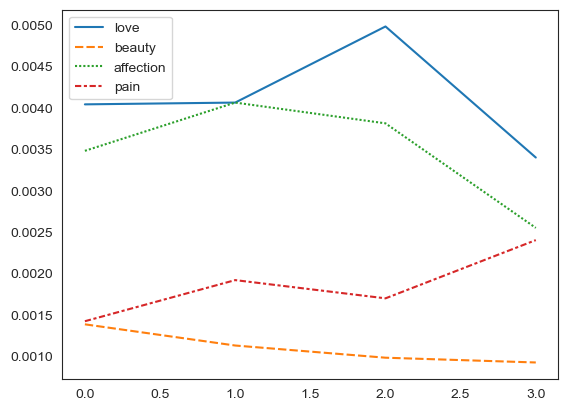

In [162]:
sns.lineplot(data=pd.DataFrame({"love":love,"beauty":beauty,"affection":affection,"pain":pain}))

In [80]:
# We can observe how as the story progresses, beauty and affection categories decrease, while love and pain intensify!

### We can create custom categories based on seed terms!
### Models trained on: fiction, nytimes or reddit

In [81]:
lexicon.create_category("healthy_food", ["healthy_food","low_carb","kale","avocado"], model="nytimes")

["avocado", "kale", "Swiss_chard", "escarole", "black_beans", "cucumber", "dill", "leek", "mango", "red_peppers", "chicory", "chanterelles", "chutney", "tamarind", "papaya", "black_olives", "endive", "pesto", "walnuts", "green_beans", "bok_choy", "portobello_mushrooms", "lemon_grass", "radicchio", "ricotta", "chicken_breast", "porcini", "blue_cheese", "snow_peas", "pickled", "Gorgonzola", "chorizo", "yams", "hazelnuts", "fresh_tomatoes", "shiitake_mushrooms", "anchovies", "wild_rice", "scallion", "red_onions", "broccoli_rape", "red_cabbage", "wasabi", "sweet_potato", "feta", "roasted_garlic", "compote", "napoleon", "aioli", "crab_meat", "cauliflower", "jicama", "parsnips", "apricots", "new_potatoes", "truffle_oil", "lemongrass", "pistachios", "saut\u00e9ed", "gnocchi", "duck_confit", "fresh_herbs", "ratatouille", "white_beans", "croutons", "fresh_mozzarella", "squab", "watercress", "roasted_red_peppers", "pine_nuts", "fritters", "butternut_squash", "fava_beans", "drizzled", "red_onion"

In [82]:
lexicon.create_category("healthy_food", ["healthy_food","low_carb","kale","avocado"], model="reddit")

["green_vegetables", "leafy_greens", "whole_grain_bread", "brown_rice", "white_rice", "green_veggies", "veggies", "whole_wheat_bread", "sweet_potatoes", "raw_veggies", "lean_meat", "spinach", "fatty_meat", "kale", "sweet_potato", "avocado", "hummus", "chicken_breast", "veggie", "whole_grain", "vegetables", "whole_wheat_pasta", "salads", "broccoli", "greek_yogurt", "Greek_yogurt", "yogurt", "avocados", "rice_cakes", "raw_vegetables", "almonds", "lean_protein", "grilled_chicken", "quinoa", "steamed_broccoli", "whole_grain_pasta", "brocolli", "kale", "avocado", "tofu", "Veggies", "edamame", "more_veggies", "lean_meats", "quinoa", "salad", "cottage_cheese", "whole_wheat", "wheat_bread", "romaine_lettuce", "white_bread", "raw_spinach", "oatmeal", "white_potatoes", "almond_butter", "pork_rinds", "veg", "cashews", "greek_yoghurt", "baby_carrots", "fresh_veggies", "fatty_meats", "more_vegetables", "avacado", "veges", "nut_butter", "hard_boiled_eggs", "carrot_sticks", "whole_grains", "grilled_c

In [83]:
lexicon.create_category("festive_food", ["festive_food","turkey","eggnog"], model="nytimes")

["turkey", "roast_beef", "white_bread", "fried_chicken", "pancakes", "peanut_butter", "gefilte_fish", "stuffing", "French_fries", "meatloaf", "brisket", "potato_salad", "pumpkin_pie", "scrambled_eggs", "french_fries", "spaghetti", "gravy", "tamales", "pot_roast", "oatmeal", "lasagna", "corned_beef", "latkes", "pickles", "sauerkraut", "burger", "grits", "biscuits", "hamburger", "salad_bar", "corn_bread", "chicken_soup", "bacon", "cream_cheese", "brownies", "tofu", "pastrami", "pork_chops", "salami", "marshmallows", "collard_greens", "macaroni", "pies", "raw_fish", "eggnog", "cheeseburgers", "truffles", "chocolate_cake", "hard-boiled_eggs", "baked_potatoes", "venison", "cottage_cheese", "pheasant", "applesauce", "quail", "fruit_salad", "meatballs", "chocolate_chip_cookies", "tacos", "roast", "jelly", "chicken_salad", "omelet", "gumbo", "steaks", "soup", "lox", "sausage", "roast_chicken", "rye", "bagel", "fruitcake", "fries", "fried_eggs", "ketchup", "chicken_wings", "barbecue_sauce", "sw

### List of further resources
    * NLTK
    * Jellyfish: string similarity library
    * TextBlob: simplified text processing
    * PyEnchant: language detection
    * WordNet: ontology of concepts (inc. in NLTK)
    * Stanford NLP (Java)
    * Tweet NLP: https://www.cs.cmu.edu/~ark/TweetNLP/

# Part 2

### Question 1:
An NLP preprocessing model, using the list of stopwords ['a', 'the', 'is', 'you', 'I','my','with','was'] for the input sentence
“I was driving down the street with my CAR! :)” <br>
gives the following output: {driving, down, street, car, :)}.
The model consists of: <br>

a) Stopword Removal, Casefolding and Stemming <br>
b) **Stopword Removal and Casefolding** <br>
c) Stopword Removal and Stemming <br>
d) Casefolding and Stemming <br>

In [84]:
# write your code and/or answer here


### Question 2:
What statement is false about topic detection using LSA: <br>

a) It finds the representation of documents and words in the latent "topic space" <br>
b) It produces topics interpretable in “word space” <br>
c) **A document's topic representation is a probability distribution over topics** <br>
d) The vectors representing topics in “word space” are linearly independent <br>

In [85]:
# write your code and/or answer here
# c)

### Question 3:
The problem of having more features than documents when using a TF-IDF matrix for document classification cannot be addressed by: <br>

a) Using SVD for dimensionality reduction <br>
b) **Using min-max scaling of features** <br>
c) Penalizing very large positive and very large negative weights (a.k.a. regularization) <br>
d) Using online feature selection <br>

In [163]:
# write your code and/or answer here
# b) Scaling will not remove any features, it will just make the features very small.
# Regularization is a form of feature selection, because it will remove features that are not important by making their coefficients very small, in order to reduce the loss function.
# Regularization works by adding a penalty term to the loss function, which is the sum of the squared coefficients. So the loss function becomes:
# L = L + λ * Σ(wi^2). The λ is the regularization parameter, which is a hyperparameter that we can tune. The larger the λ, the more the coefficients will be penalized, and the more features will be removed.
# So the model needs to minimize both the error AND the penalty term, which will make the coefficients smaller, and thus remove features.

### Question 4:
Which of the following is false about word vectors: <br>

a) Word2vec is used to achieve a lower dimensional representation than bag of words <br>
b) Semantically similar words typically have similar word2vec vectors <br>
c) Each dimension in the word2vec embedding has a clear interpretation <br>
d) Word2Vec can be used for the computation of sentence vectors <br>

In [164]:
# write your code and/or answer here
# c)

### Question 5:
Given the following word (W) / context (C) co-occurrence frequencies, which statement is true regarding the pointwise mutual information (PMI)?

|  |W1|W2|W3|
|--|--|--|--|
|C1| 2| 0| 3|
|C2| 6| 4| 0|
|C3| 1| 1| 3|

a) PMI(w=W1, c=C2) > PMI(w=W2, c=C2) > PMI(w=W3, c=C3) <br>
b) PMI(w=W2, c=C2) > PMI(w=W1, c=C2) >  PMI(w=W3, c=C3) <br>
c) PMI(w=W3, c=C3) > PMI(w=W1, c=C2) > PMI(w=W2, c=C2) <br>
d) **PMI(w=W3, c=C3) > PMI(w=W2, c=C2) > PMI(w=W1, c=C2)** <br>

In [168]:
def PMI(word_context_count, word_count, context_count, total_words):
    P_w_c = word_context_count / total_words #times word occurs together with context / Total_words
    P_w = word_count / total_words #times word occurs / Total_words
    P_c = context_count / total_words #times context occurs / Total_words
    PMI_w_c = np.log(P_w_c/(P_w * P_c))
    return PMI_w_c
{'w1 C2': PMI(6, 9, 10, 20), 
 'w2 C2': PMI(4, 5, 10, 20), 
 'w3 C3': PMI(3, 6, 5, 20)}

{'w1 C2': 0.28768207245178085,
 'w2 C2': 0.47000362924573563,
 'w3 C3': 0.6931471805599453}